# nadpis

In [5]:
import pandas as pd

# Load dataset
df = pd.read_csv("movies_metadata.csv", low_memory=False)

# Convert budget and revenue to numeric
df["budget"] = pd.to_numeric(df["budget"], errors="coerce")
df["revenue"] = pd.to_numeric(df["revenue"], errors="coerce")

# Remove movies with missing or zero budget/revenue
df = df[(df["budget"] > 0) & (df["revenue"] > 0)]

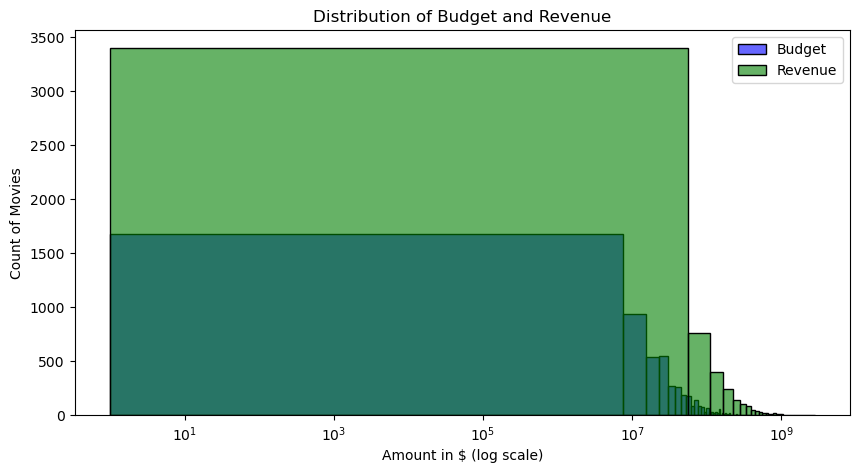

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
sns.histplot(df["budget"], bins=50, color="blue", alpha=0.6, label="Budget")
sns.histplot(df["revenue"], bins=50, color="green", alpha=0.6, label="Revenue")
plt.xscale("log")
plt.xlabel("Amount in $ (log scale)")
plt.ylabel("Count of Movies")
plt.title("Distribution of Budget and Revenue")
plt.legend()
plt.show()

In [7]:
# Create binary target variable
df["success"] = df["revenue"] > (2 * df["budget"])
df["success"] = df["success"].astype(int)  # Convert to 0 (flop) / 1 (hit)

In [8]:
# Selecting useful columns
features = ["budget", "popularity", "runtime", "vote_count", "vote_average"]
df = df[features + ["success"]].dropna()  # Drop rows with missing values

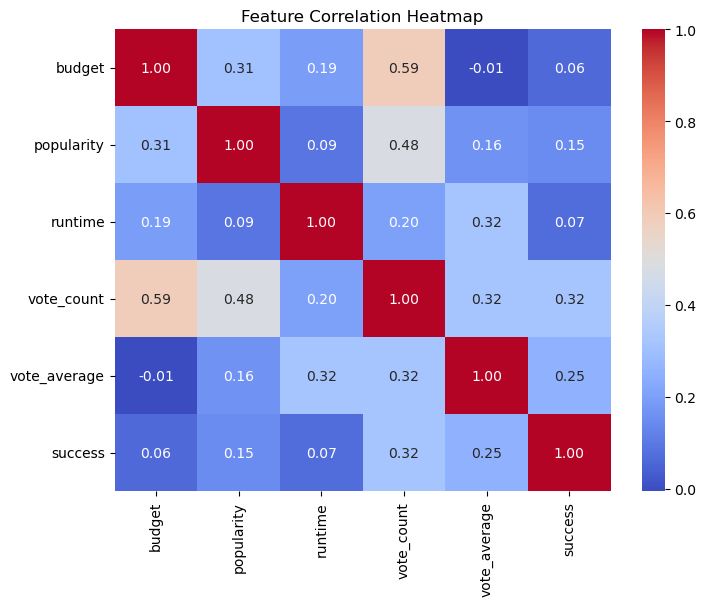

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[["budget", "popularity", "runtime", "vote_count", "vote_average"]] = scaler.fit_transform(
    df[["budget", "popularity", "runtime", "vote_count", "vote_average"]]
)

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Split data
X = df[features]
y = df["success"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.6858736059479554
              precision    recall  f1-score   support

           0       0.67      0.70      0.68       522
           1       0.71      0.67      0.69       554

    accuracy                           0.69      1076
   macro avg       0.69      0.69      0.69      1076
weighted avg       0.69      0.69      0.69      1076



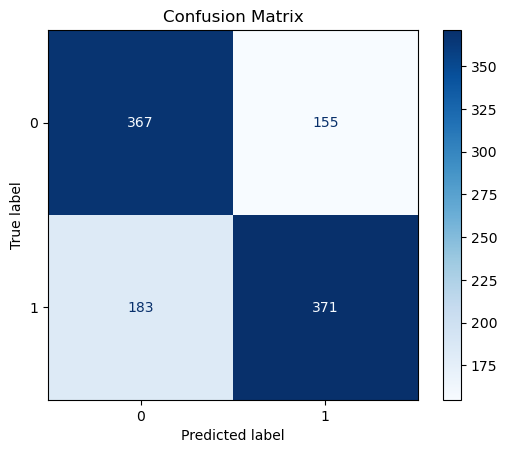

In [12]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt
import xgboost as xgb

# Load dataset
df = pd.read_csv("movies_metadata.csv", low_memory=False)

# Clean numeric columns (budget, revenue)
df['budget'] = pd.to_numeric(df['budget'], errors='coerce')
df['revenue'] = pd.to_numeric(df['revenue'], errors='coerce')

# Drop rows with missing or zero budget/revenue
df = df.dropna(subset=['budget', 'revenue'])
df = df[(df['budget'] > 0) & (df['revenue'] > 0)]

# Create binary target variable: hit = 1, flop = 0
df['hit'] = (df['revenue'] > 2 * df['budget']).astype(int)

# Select relevant features (example: budget, runtime)
df['runtime'] = pd.to_numeric(df['runtime'], errors='coerce')
df = df.dropna(subset=['runtime'])
features = ['budget', 'runtime']
X = df[features]
y = df['hit']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train XGBoost Classifier
model = xgb.XGBClassifier( eval_metric='logloss')
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Flop", "Hit"])
disp.plot(cmap="Blues")
plt.title("XGBoost Confusion Matrix")
plt.show()

# Classification report
print(classification_report(y_test, y_pred, target_names=["Flop", "Hit"]))